#Online Retail Dataset:

Online retail is a transactional data collection comprising all transactions for a UK-based and registered online retail non-store between 01/12/2010 and 09/12/2011. The business primarily offers distinctive all-occasion gifts. Many of the firm's clients are wholesalers.

The size of this dataset is about 541910 rows and 8 columns (invoice number, Stock code, Description, Quantity, Invoice date, Unit price, Customer ID)
We have performed Unsupervised learning algorithms on this dataset like K-Means, GMM, DBSCAN and Hierarchical clustering algorithms.


#Context

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device -protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

#Feature Description

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.




#Understanding the problem and Project Structure

 We will segment the customers based on their recency, frequency, and monetary values. Before applying K-Means Clustering, I need to perform data pre-processing. This involves examining feature correlations and distributions. Additionally, I will normalize the data to ensure that it is suitable for the K-Means algorithm.

We will also need to specify the number of clusters for the K-Means algorithm. To determine the optimal number of clusters, I will use methods such as the Elbow method and Silhouette Analysis.

Once I have completed these steps, we will apply K-Means for cluster estimation. We will visualize the cluster distribution using a scatter plot and analyze the resulting clusters with a boxplot. This will allow me to tag the clusters and interpret the results.

The process will include the following steps:

Data Cleaning & Exploratory Data Analysis

RFM Analysis

Customer Segmentation

Applying K-Means Clustering



---



#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.mixture import GaussianMixture

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

In [2]:
#pip install openpyxl



---



## Exploratory Data Analysis





In [3]:
df = pd.read_excel("online_retail_II.xlsx", sheet_name=1)

In [4]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Description of Numeircal Columns**

In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.00,541910,541910.00,406830.00
mean,9.55,2011-07-04 13:35:22.342307584,4.61,15287.68
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


**Decscription of categorical columns**

In [7]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


**Checking for null values**

In [8]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


In [9]:
#df = df.dropna()
df.shape

(541910, 8)

In [10]:
# Changing the datatype of Customer Id as per Business understanding

df['Customer ID'] = df['Customer ID'].astype(str)

**BASIC ANALYSIS**

In [11]:
#Dropped null customer IDS

df = df.dropna(subset=['Customer ID'])
df.shape

(541910, 8)

In [12]:
# Dropped rows where price and quantity were negative

df = df[(df['Price'] > 0) & (df['Quantity'] > 0)]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France




---



#Feature Engineering: Creating RFM features

Recency: How recently the customer made a purchase

Frequency: How often do they purchase

Monetary Value: How much they spent

RFM Analysis answers the following questions:

Who are our best customers?

Who has the potential to be converted into more profitable customers?

Which customers do we need to retain?

Which group of customers is most likely to respond to our marketing campaign?

In [13]:
# New Attribute : Amount from Quantity and Price:

df['Amount'] = df['Quantity']*df['Price']
rfm_m = df.groupby('Customer ID')['Amount'].sum() #getting unique customers in our dataset
rfm_m = rfm_m.reset_index()
rfm_m

,Customer ID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2094.88
4337,18287.0,1837.28


In [14]:
# New Attribute : Frequency - count how many invoices each customer has - use the Invoice feature
rfm_f = df.groupby('Customer ID')['Invoice'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['Customer ID', 'Frequency']
rfm_f

,Customer ID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18281.0,7
4335,18282.0,12
4336,18283.0,756
4337,18287.0,70


In [15]:
# Merging the two dfs
rfm = pd.merge(rfm_m, rfm_f, on='Customer ID', how='inner')
rfm.head()

,Customer ID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [16]:
# New Attribute : Recency
# 1. To calculate recency, we need to choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.
# 2. Create a new column called Date which contains the invoice date without the timestamp.
# 3. Group by CustomerID and check the last date of purchase.
# 4. Calculate the days since last purchase.
# 5. Drop Last_Purchase_Date since we don't need it anymore.

# Convert to datetime to proper datatype

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

# Compute the maximum date to know the last transaction date

max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [17]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df.head()

# Compute last transaction date to get the recency of customers

rfm_p = df.groupby('Customer ID')['Diff'].min()
rfm_p = rfm_p.reset_index()

# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days

In [18]:
# Merge tha dataframes to get the final RFM dataframe
rfm = pd.merge(rfm, rfm_p, on='Customer ID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']

**RFM Dataset**

In [19]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4334,18281.0,80.82,7,180
4335,18282.0,178.05,12,7
4336,18283.0,2094.88,756,3
4337,18287.0,1837.28,70,42




---



#Graphical Analysis

**Correlation heatmap**

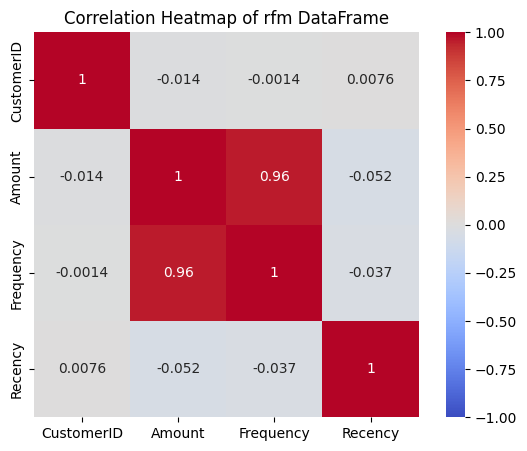

In [20]:
# Calculate the correlation matrix
correlation_matrix = rfm.corr()

# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)

# Display the plot
plt.title('Correlation Heatmap of rfm DataFrame')
plt.show()

Amount and Frequency are highly correlated, meaning frequent buyers tend to spend more.

Recency is largely independent of both Amount and Frequency, suggesting that how recently a customer purchased isn’t necessarily tied to how much or how often they buy.

CustomerID serves as a unique identifier with no real correlation with other metrics, as expected.



---



**Multicollinearity**

In [21]:
# Empty list for storing feature names with multicollinearity
collinear_pairs = []

# Loop through the upper triangle of the correlation matrix to avoid duplicate checks
for col in correlation_matrix.columns:
    for i in correlation_matrix.index:
        correlation_value = correlation_matrix[col][i]
        if 0.85 < abs(correlation_value) < 1:  # Check for strong correlation (positive or negative)
            collinear_pairs.append((col, i))  # Add the pair to the list
            print(f"\033[1;31mMulticollinearity alert\033[0m between {col} - {i}")
        else:
            print(f"For {col} and {i}, there is \033[1mNO multicollinearity problem\033[0m")

# Unique list of features with multicollinearity
unique_list = list(set([item for pair in collinear_pairs for item in pair]))
print("\033[1mThe total number of strongly correlated features:\033[0m", len(unique_list))

For CustomerID and CustomerID, there is NO multicollinearity problem
For CustomerID and Amount, there is NO multicollinearity problem
For CustomerID and Frequency, there is NO multicollinearity problem
For CustomerID and Recency, there is NO multicollinearity problem
For Amount and CustomerID, there is NO multicollinearity problem
For Amount and Amount, there is NO multicollinearity problem
Multicollinearity alert between Amount - Frequency
For Amount and Recency, there is NO multicollinearity problem
For Frequency and CustomerID, there is NO multicollinearity problem
Multicollinearity alert between Frequency - Amount
For Frequency and Frequency, there is NO multicollinearity problem
For Frequency and Recency, there is NO multicollinearity problem
For Recency and CustomerID, there is NO multicollinearity problem
For Recency and Amount, there is NO multicollinearity problem
For Recency and Frequency, there is NO multicollinearity problem
For Recency and Recency, there is NO multicolline



---



**Outlier Analysis**

Text(0.5, 0, 'Attributes')

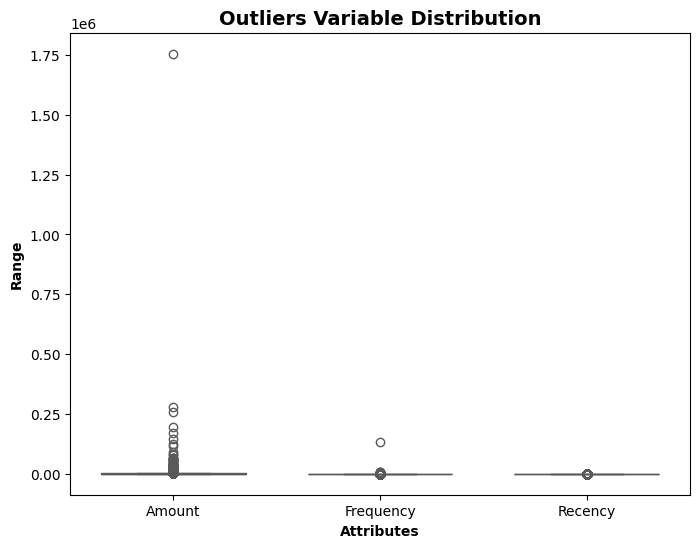

In [22]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [8,6]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Amount has significant outliers, with one particularly extreme value over 1.75 million. This suggests that some customers have unusually high spending, which could be impacting the analysis.

Frequency also has a few outliers, indicating that some customers make far more purchases than average.

Recency has a minor outlier effect, suggesting that most customers have recent purchase dates, with only a few showing significantly older recency values.


In [23]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]



---



**Feature Relationships and Distributions**

In [24]:
import plotly.express as px

fig = px.scatter_matrix(rfm,
                        dimensions=['Recency', 'Frequency', 'Amount'],

                        width=800, height=600)

fig.show()

**Inference:**

The scatter plot matrix shows relationships between Recency, Frequency, and Amount:

Diagonals: Straight lines as each variable is plotted against itself.

Recency vs. Frequency: Negative correlation; higher recency (less recent activity) aligns with lower frequency.

Recency vs. Amount: Negative correlation; higher recency is linked to lower spending.

Frequency vs. Amount: Loose positive correlation; more frequent customers tend to spend more.

Overall, higher recency means less engagement and spending, while higher frequency generally correlates with higher spending.

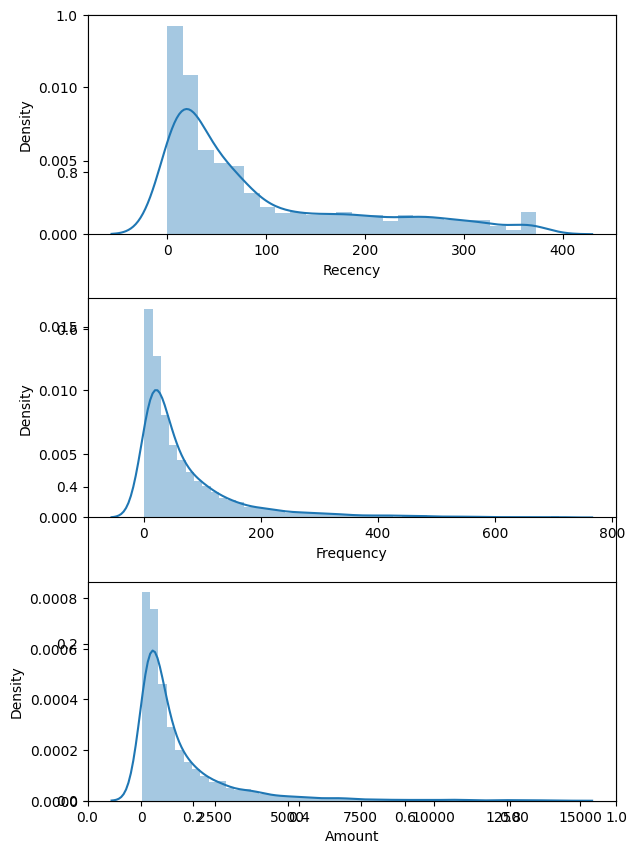

In [25]:
# plot the distribution of RFM values
f, ax = plt.subplots(figsize=(7, 9))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.Amount, label = 'Amount')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()



---



**Standardization**

In [26]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4256 entries, 1 to 4337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4256 non-null   object 
 1   Amount      4256 non-null   float64
 2   Frequency   4256 non-null   int64  
 3   Recency     4256 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 166.2+ KB


In [27]:
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4256, 3)

In [28]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled

,Amount,Frequency,Recency
0,1.65,1.07,-0.92
1,0.26,-0.46,-0.19
2,0.24,-0.04,-0.75
3,-0.54,-0.60,2.16
4,0.65,0.09,-0.58
...,...,...,...
4251,-0.63,-0.68,-0.20
4252,-0.63,-0.67,1.84
4253,-0.68,-0.70,0.87
4254,-0.63,-0.65,-0.86




---



##VARIOUS CLUSTERING TECHNIQUES

**Hopkins Test**

The Hopkins statistic is a way of measuring the cluster tendency of a data set. Hopkins statistic ranges from 0 to 1:

Value close to 1: The dataset has a tendency to cluster.

Value close to 0: The dataset is uniformly distributed and doesn't show clustering behavior.

In [29]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def hopkins_test(X, sample_size=0.1):
    # Convert DataFrame to array if necessary
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Define the sample size for the test
    n = int(sample_size * X.shape[0])  # Sample size for Hopkins test
    d = X.shape[1]  # Number of dimensions

    # Random sample of points from X
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    # Select n random points from the dataset
    rand_X = np.random.choice(X.shape[0], n, replace=False)  # Ensures no duplicate selection

    u_distances = []

    # Generate random uniform points in the same feature space
    random_points = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), (n, d))

    # Calculate the distance between random points and nearest neighbors in X
    for rand_point in random_points:
        u_distance, _ = nbrs.kneighbors([rand_point], n_neighbors=1)
        u_distances.append(u_distance[0][0])

    # Calculate the distance between sample points from X and their nearest neighbors
    w_distances = []
    for sample_point in X[rand_X]:
        w_distance, _ = nbrs.kneighbors([sample_point], n_neighbors=2)
        w_distances.append(w_distance[0][1])  # second point to avoid zero distance to itself

    # Hopkins statistic
    H = sum(u_distances) / (sum(u_distances) + sum(w_distances))
    return H

# Usage example:
# Assuming rfm_scaled_df is your dataset with scaled numerical values
hopkins_score = hopkins_test(rfm_df_scaled)
print("Hopkins Score:", hopkins_score)

Hopkins Score: 0.9434147779938264


#Kmeans Clustering

##Determining optimal k

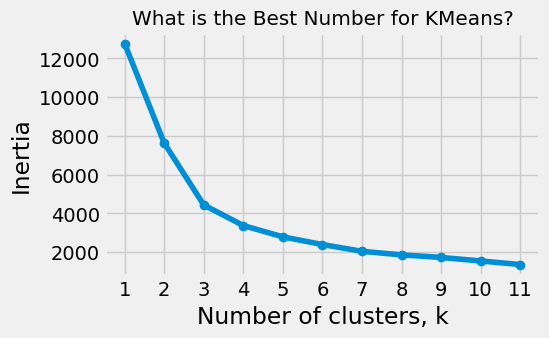

In [30]:
#First : Get the Best KMeans
ks = range(1, 12)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k, random_state=42)
    kc.fit(rfm_df_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(5, 3))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans?')
plt.show()

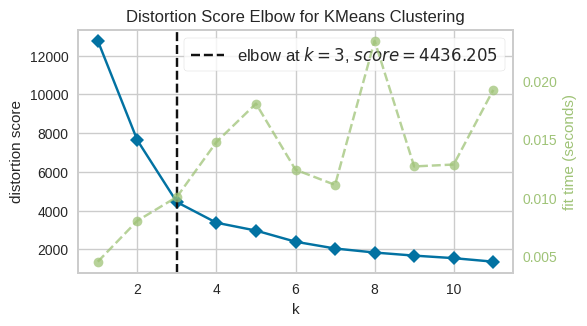

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer

# we will use rfm_scaled data from mow instead of rfm_log

plt.rcParams['figure.facecolor'] = 'white'
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))

plt.figure(figsize=(5, 3))
visualizer.fit(rfm_df_scaled)
visualizer.show()

In [32]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
silhouette = []
davies_bouldin = []
inertia = []
for k in range(2,11):
    kmeans = KMeans (n_clusters = k , random_state = 42)
    kmeans.fit (rfm_df_scaled)

    score = silhouette_score (rfm_df_scaled , kmeans.predict(rfm_df_scaled))
    silhouette.append (score)
    score2 = davies_bouldin_score (rfm_df_scaled, kmeans.predict(rfm_df_scaled))
    davies_bouldin.append (score2)

    score3 = kmeans.inertia_
    inertia.append (score3)

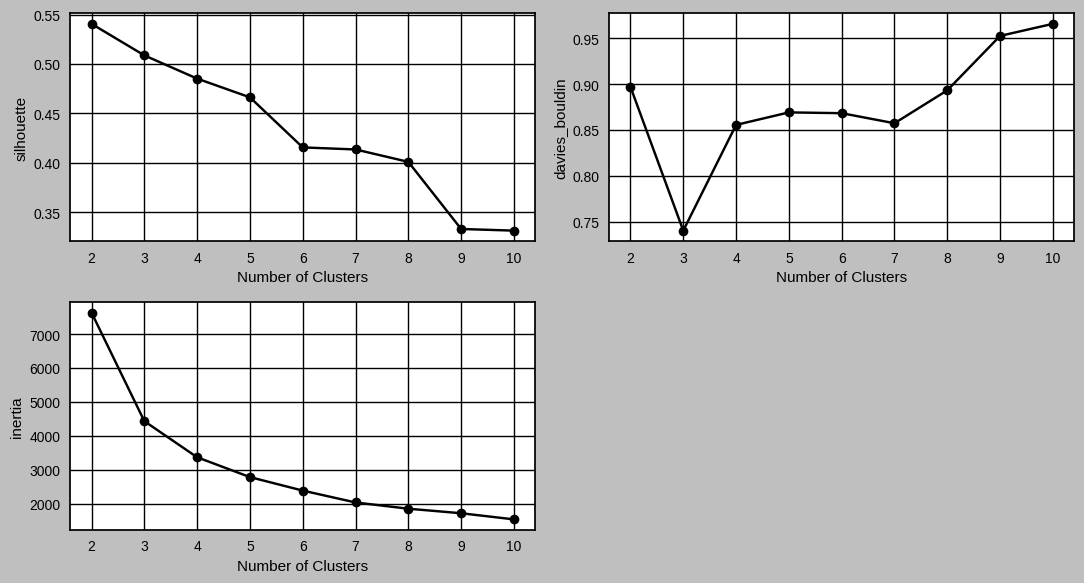

In [33]:
plt.style.use('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(11, 6))

# Define metrics and their values
metrics = {'silhouette': silhouette, 'davies_bouldin': davies_bouldin, 'inertia': inertia}
metrics_list = list(metrics.items())

# Loop to plot each metric on the grid
for i in range(2):
    for j in range(2):
        index = i * 2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[index]
            axs[i, j].plot(range(2, 11), metric_values, marker='o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)
        else:
            fig.delaxes(axs[i, j])  # Remove the empty subplot

plt.tight_layout()
plt.show()

In [34]:
ssd =[]
K = range(2, 12)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(rfm_df_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(rfm_df_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.5405818239717701
Silhouette Score for 3 clusters: 0.5086407990053111
Silhouette Score for 4 clusters: 0.4851058093794617
Silhouette Score for 5 clusters: 0.4684365913571524
Silhouette Score for 6 clusters: 0.4159119484123154
Silhouette Score for 7 clusters: 0.31114877711604816
Silhouette Score for 8 clusters: 0.3285676666602729
Silhouette Score for 9 clusters: 0.33516323821041816
Silhouette Score for 10 clusters: 0.3435631138785245
Silhouette Score for 11 clusters: 0.33656959178617923


**Choose k = 3 acc. to Elbow method and Davies Bouldin**






---



##Kmeans Implementation

In [35]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the data to two dimensions for easier interpretation
pca = PCA(n_components=3)
pca_result = pca.fit_transform(rfm_df_scaled)

# Check the explained variance ratio for each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Get the component loadings (feature contributions to the components)
pca_components = pd.DataFrame(pca.components_, columns=rfm_df_scaled.columns)
print("PCA components (feature importance):")
pca_components

Explained variance ratio: [0.63631972 0.25253264 0.11114764]
PCA components (feature importance):


,Amount,Frequency,Recency
0,0.62,0.63,-0.46
1,0.36,0.29,0.89
2,-0.70,0.72,0.04


In [36]:
kmeans = KMeans(n_clusters = 3).fit(rfm_df_scaled)
kmeans.fit_predict(rfm_df_scaled)
labels = kmeans.labels_
rfm['ClusterID']=labels
rfm

,CustomerID,Amount,Frequency,Recency,ClusterID
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1
5,12352.0,2506.04,85,35,2
...,...,...,...,...,...
4332,18278.0,173.90,9,73,2
4333,18280.0,180.60,10,277,1
4334,18281.0,80.82,7,180,1
4335,18282.0,178.05,12,7,2


In [37]:
# Calculate the Silhouette Score
silhouette = silhouette_score(rfm_df_scaled, labels)

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(rfm_df_scaled, labels)

# Print the results
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.5087447915808871
Davies-Bouldin Index: 0.7402170887738294


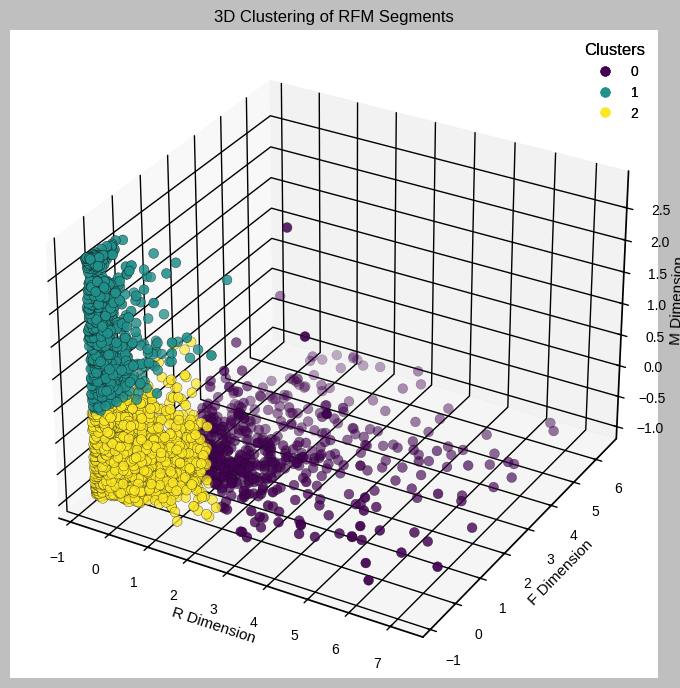

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import seaborn as sns

# Assuming your DataFrame rfm_df_scaled has three columns for RFM metrics, e.g., "R", "F", "M"
# And rfm['Cluster_Id'] has the cluster assignments from k-means

# Extract the columns for 3D plotting
x = rfm_df_scaled.iloc[:, 0]  # First column
y = rfm_df_scaled.iloc[:, 1]  # Second column
z = rfm_df_scaled.iloc[:, 2]  # Third column
clusters = rfm['ClusterID']   # Cluster labels

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a color palette with a different color for each cluster
palette = sns.color_palette("hsv", n_colors=3)

# Plot each point, coloring by cluster
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis', marker='o', s=50, edgecolor='k')

# Label axes based on the RFM dimensions (customize if needed)
ax.set_xlabel('R Dimension')
ax.set_ylabel('F Dimension')
ax.set_zlabel('M Dimension')

# Add a color legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Show plot
plt.title("3D Clustering of RFM Segments")
plt.show()

Cluster 0 (Purple) - "New/Infrequent Shoppers"

These customers have recently made purchases but do so infrequently and spend relatively less. They may be new customers or occasional shoppers who need more encouragement to return and engage.

Cluster 1 (Teal) - "Loyal Regulars"

These customers purchase more frequently and show a range in recency. They tend to be repeat purchasers with moderate spending levels. This group could represent loyal or consistent customers who would respond well to loyalty programs and regular engagement.

Cluster 2 (Yellow) - "High-Value/Big Spenders"

This group consists of customers who make significant purchases (high monetary value), even if they don't buy as frequently. They are high-value customers who might not need frequent engagement but are prime targets for premium offers or VIP treatment.


In [39]:
rfm.ClusterID.value_counts()

,count
ClusterID,
2,2711
1,1050
0,495




```

```

**Cluster Mean and variances**

In [40]:
# Select only numeric columns for calculations, excluding non-numeric columns
numeric_features = rfm.select_dtypes(include=np.number).columns.drop('ClusterID')

# Calculate the mean and variance for each cluster on numeric columns only
cluster_stats = rfm.groupby('ClusterID')[numeric_features].agg(['mean', 'var'])

cluster_stats

Amount                                 Frequency  \
                          mean                  var                 mean   
ClusterID                                                                  
0                      5070.84           7752988.27               281.88   
1                       431.41            217190.16                25.66   
2                       981.67            692805.81                58.71   

                                            Recency                       
                           var                 mean                  var  
ClusterID                                                                 
0                     19544.60                22.93              1200.38  
1                       734.63               248.28              4368.31  
2                      2459.13                45.62              1372.23

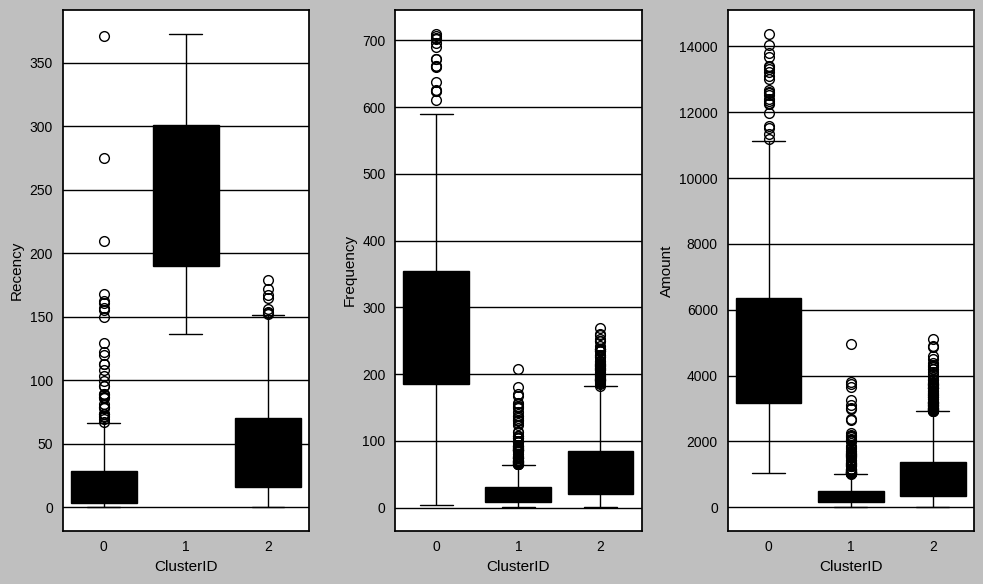

In [41]:
plt.figure(figsize=(10,6))

# Boxplot for Recency by ClusterID
plt.subplot(1, 3, 1)
sns.boxplot(x='ClusterID', y='Recency', data=rfm)

# Boxplot for Frequency by ClusterID
plt.subplot(1, 3, 2)
sns.boxplot(x='ClusterID', y='Frequency', data=rfm)

# Boxplot for Monetary by ClusterID
plt.subplot(1, 3, 3)
sns.boxplot(x='ClusterID', y='Amount', data=rfm)

# Show the plots
plt.tight_layout()
plt.show()


**Recency (Left Plot):**

Cluster 0 has low recency values, indicating recent purchases. Most customers in this cluster have made recent purchases, confirming the previous label of "New/Infrequent Shoppers".
Cluster 1 shows high variability in recency, with a mix of customers who have not made recent purchases. This aligns with the label "Loyal Regulars" as they might be more spread out in their purchase timings.
Cluster 2 has relatively low recency values but with a wide range. This could indicate high-value customers who have shopped recently but not as frequently.

**Frequency (Middle Plot):**

Cluster 1 has the highest frequency values, indicating that these customers purchase the most frequently. This supports the "Loyal Regulars" label, as these customers are consistently engaging with the business.
Cluster 0 has low frequency, aligning with "New/Infrequent Shoppers".
Cluster 2 has moderate frequency, further supporting the "High-Value/Big Spenders" label, as they shop less frequently but have a higher monetary value.

**Monetary Value (Right Plot):**

Cluster 2 has the highest monetary values among the clusters, confirming it represents "High-Value/Big Spenders".
Cluster 1 has moderate monetary values, supporting the "Loyal Regulars" label.
Cluster 0 has low monetary values, consistent with "New/Infrequent Shoppers".


**Giving labels to customers**

In [42]:
rfm['Labels'] = rfm['ClusterID'].map({0:'New/Infrequent Shoppers', 1:'Loyal Regulars', 2:'High-Value/Big Spenders'})
rfm

,CustomerID,Amount,Frequency,Recency,ClusterID,Labels
1,12347.0,4310.00,182,1,0,New/Infrequent Shoppers
2,12348.0,1797.24,31,74,2,High-Value/Big Spenders
3,12349.0,1757.55,73,18,2,High-Value/Big Spenders
4,12350.0,334.40,17,309,1,Loyal Regulars
5,12352.0,2506.04,85,35,2,High-Value/Big Spenders
...,...,...,...,...,...,...
4332,18278.0,173.90,9,73,2,High-Value/Big Spenders
4333,18280.0,180.60,10,277,1,Loyal Regulars
4334,18281.0,80.82,7,180,1,Loyal Regulars
4335,18282.0,178.05,12,7,2,High-Value/Big Spenders


###Hyperparameter Tuning of Kmeans

In [43]:
# Initiatization method

silhouette = []
init_values = ['k-means++' , 'random']
for i in init_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 2)
    kmeans.fit (rfm_df_scaled)
    score = silhouette_score(rfm_df_scaled, kmeans.predict(rfm_df_scaled))
    silhouette.append(score)

df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_init = pd.DataFrame(init_values, columns=['init'])
result = pd.concat([df_init, df_silhouette], axis=1)
result

,init,silhouette_score
0,k-means++,0.51
1,random,0.51


In [44]:
# n_init‘auto’ or int, default=’auto’
# Number of times the k-means algorithm is run with different centroid seeds.

silhouette = []
n_init_values = range(6, 16, 1)
for i in n_init_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 42)
    kmeans.fit (rfm_df_scaled)
    score = silhouette_score(rfm_df_scaled, kmeans.predict(rfm_df_scaled))
    silhouette.append(score)
df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_n_init = pd.DataFrame(n_init_values, columns=['n_init'])
result = pd.concat([df_n_init, df_silhouette], axis=1)
result

,n_init,silhouette_score
0,6,0.51
1,7,0.51
2,8,0.51
3,9,0.51
4,10,0.51
5,11,0.51
6,12,0.51
7,13,0.51
8,14,0.51
9,15,0.51


In [45]:
# max_iterint, default=300
# Maximum number of iterations of the k-means algorithm for a single run.

silhouette = []
max_iter_values = range(295, 306, 1)
for i in max_iter_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 42)
    kmeans.fit (rfm_df_scaled)
    score = silhouette_score(rfm_df_scaled, kmeans.predict(rfm_df_scaled))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_max_iter = pd.DataFrame(max_iter_values, columns=['max_iter'])
result = pd.concat([df_max_iter, df_silhouette], axis=1)
result

,max_iter,silhouette_score
0,295,0.51
1,296,0.51
2,297,0.51
3,298,0.51
4,299,0.51
5,300,0.51
6,301,0.51
7,302,0.51
8,303,0.51
9,304,0.51


In [46]:
#algorithm{“lloyd”, “elkan”}, default=”lloyd”
#K-means algorithm to use. The classical EM-style algorithm is "lloyd". The "elkan" variation can be more efficient on some
#datasets with well-defined clusters, by using the triangle inequality.

silhouette = []
algorithm_values = ['lloyd' , 'elkan' , 'auto' , 'full']
for i in algorithm_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 42)
    kmeans.fit (rfm_df_scaled)
    score = silhouette_score(rfm_df_scaled, kmeans.predict(rfm_df_scaled))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_algorithm = pd.DataFrame(algorithm_values, columns=['algorithm'])
result = pd.concat([df_algorithm, df_silhouette], axis=1)
result

,algorithm,silhouette_score
0,lloyd,0.51
1,elkan,0.51
2,auto,0.51
3,full,0.51


#Mini Batch Kmeans Clustering

The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration.

In [47]:
from sklearn.cluster import MiniBatchKMeans

MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42) #default kmeans++
MB.fit (rfm_df_scaled)
score = silhouette_score (rfm_df_scaled , MB.predict(rfm_df_scaled))
score

0.3050983942810658

In [48]:
MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random')
MB.fit (rfm_df_scaled)
score = silhouette_score (rfm_df_scaled , MB.predict(rfm_df_scaled))
score

0.5076203542507055

In [49]:
#Different Batch Sizes
silhouette = []
batch_size_values = range(1010, 1030, 1)
for i in batch_size_values:
    MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random' , batch_size = i)
    MB.fit (rfm_df_scaled)
    score = silhouette_score(rfm_df_scaled, MB.predict(rfm_df_scaled))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_batch_size = pd.DataFrame(batch_size_values, columns=['batch_size'])
result = pd.concat([df_batch_size, df_silhouette], axis=1)
result

,batch_size,silhouette_score
0,1010,0.51
1,1011,0.51
2,1012,0.51
3,1013,0.50
4,1014,0.49
5,1015,0.50
6,1016,0.29
7,1017,0.51
8,1018,0.29
9,1019,0.30


In [50]:
max_score = result.loc[result['silhouette_score'].idxmax()]
max_score

,12
batch_size,1022.00
silhouette_score,0.51


Best Mini Batch Hyperparameter model

In [51]:
MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random' , batch_size = 1022)
MB.fit (rfm_df_scaled)

print ('silhouette_score : ' , silhouette_score (rfm_df_scaled , MB.predict(rfm_df_scaled)))
print ('davies_bouldin_score : ' , davies_bouldin_score (rfm_df_scaled, MB.predict(rfm_df_scaled)))
print ('inertia : ' , MB.inertia_)

silhouette_score :  0.5102159588178651
davies_bouldin_score :  0.7386507330258484
inertia :  4445.660518312951


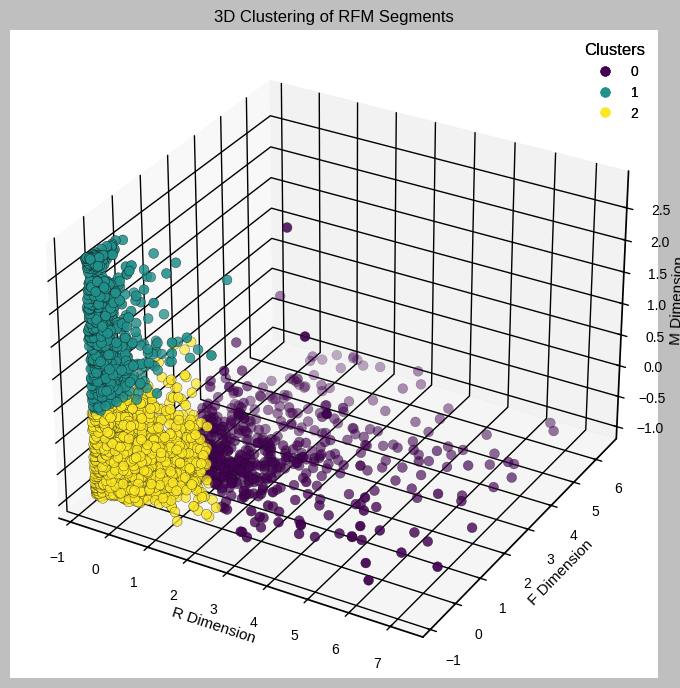

In [52]:

from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Assuming your DataFrame rfm_df_scaled has three columns for RFM metrics, e.g., "R", "F", "M"
# And rfm['Cluster_Id'] has the cluster assignments from k-means

# Extract the columns for 3D plotting
x = rfm_df_scaled.iloc[:, 0]  # First column
y = rfm_df_scaled.iloc[:, 1]  # Second column
z = rfm_df_scaled.iloc[:, 2]  # Third column
clusters = rfm['ClusterID']   # Cluster labels

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a color palette with a different color for each cluster
palette = sns.color_palette("hsv", n_colors=3)

# Plot each point, coloring by cluster
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis', marker='o', s=50, edgecolor='k')

# Label axes based on the RFM dimensions (customize if needed)
ax.set_xlabel('R Dimension')
ax.set_ylabel('F Dimension')
ax.set_zlabel('M Dimension')

# Add a color legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Show plot
plt.title("3D Clustering of RFM Segments")
plt.show()



---



#Gaussian Mixture Model

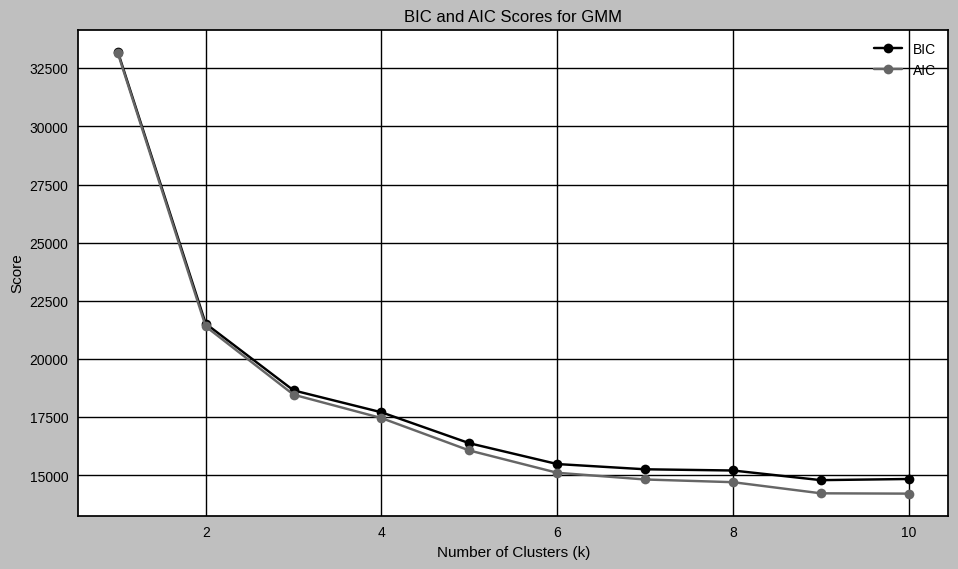

In [53]:
# Replace `df` with your DataFrame and specify the columns you want to use for clustering
X = rfm_df_scaled[['Amount', 'Frequency', 'Recency']].values  # Adjust column names as necessary

# Define the range of components (number of clusters) to evaluate
k_values = range(1, 11)
bic_scores = []
aic_scores = []

# Fit GMM and calculate BIC/AIC for each number of components
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

# Plot BIC and AIC scores to find the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(k_values, bic_scores, label='BIC', marker='o')
plt.plot(k_values, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('BIC and AIC Scores for GMM')
plt.legend()
plt.show()

In [54]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture (n_components = 4 , random_state = 1)
GMM.fit (rfm_df_scaled)
score = silhouette_score (rfm_df_scaled , GMM.predict(rfm_df_scaled))
score

0.304808286369521

In [55]:
#Different iterations
silhouette = []
max_iter_values = range(90, 110, 1)
for i in max_iter_values:
    GMM = GaussianMixture(n_components = 4, random_state = 1, max_iter = i)
    GMM.fit(rfm_df_scaled)
    score = silhouette_score(rfm_df_scaled, GMM.predict(rfm_df_scaled))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_max_iter = pd.DataFrame(max_iter_values, columns=['max_iter'])
result = pd.concat([df_max_iter, df_silhouette], axis=1)
result

,max_iter,silhouette_score
0,90,0.30
1,91,0.30
2,92,0.30
3,93,0.30
4,94,0.30
5,95,0.30
6,96,0.30
7,97,0.30
8,98,0.30
9,99,0.30


In [56]:
# covariance_type{‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
# String describing the type of covariance parameters to use. Must be one of:

# ‘full’: each component has its own general covariance matrix.

# ‘tied’: all components share the same general covariance matrix.

# ‘diag’: each component has its own diagonal covariance matrix.

# ‘spherical’: each component has its own single variance.


silhouette = []
covariance_type_values = ['tied', 'diag', 'spherical', 'full']
for i in covariance_type_values:
    GMM = GaussianMixture(n_components = 4, random_state = 1, covariance_type = i)
    GMM.fit(rfm_df_scaled)
    score = silhouette_score(rfm_df_scaled, GMM.predict(rfm_df_scaled))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_covariance_type = pd.DataFrame(covariance_type_values, columns=['covariance_types'])
result = pd.concat([df_covariance_type, df_silhouette], axis=1)
result

,covariance_types,silhouette_score
0,tied,0.50
1,diag,0.13
2,spherical,0.43
3,full,0.30


In [57]:
# all scores for covariance_type = spherical
GMM = GaussianMixture (n_components = 4 , random_state = 1 , covariance_type = 'tied')
GMM.fit (rfm_df_scaled)

print ('silhouette_score : ' , silhouette_score (rfm_df_scaled , GMM.predict(rfm_df_scaled)))
print ('davies_bouldin_score : ' , davies_bouldin_score (rfm_df_scaled, GMM.predict(rfm_df_scaled)))

silhouette_score :  0.498297920747326
davies_bouldin_score :  0.9227346191265038


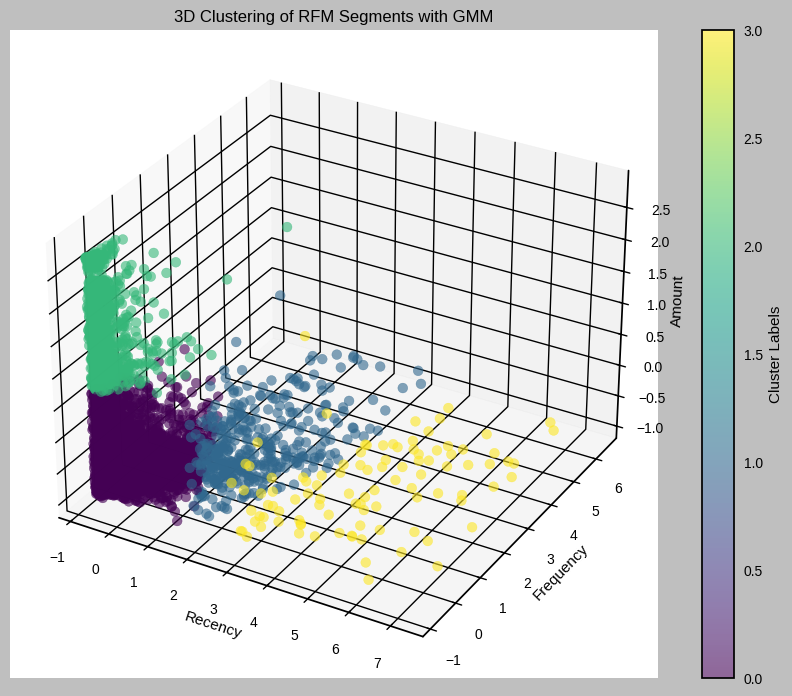

In [58]:
# Predict the cluster labels
labels = GMM.predict(rfm_df_scaled)

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels
ax.scatter(rfm_df_scaled.iloc[:, 0],  # Recency
           rfm_df_scaled.iloc[:, 1],  # Frequency
           rfm_df_scaled.iloc[:, 2],  # Amount
           c=labels, cmap='viridis', s=50, alpha=0.6)

# Setting axis labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Amount')
ax.set_title("3D Clustering of RFM Segments with GMM")

# Adding color bar for cluster labels
plt.colorbar(ax.collections[0], ax=ax, label='Cluster Labels')
plt.show()



---



#DBSCAN Clustering

Determining optimal epsilon

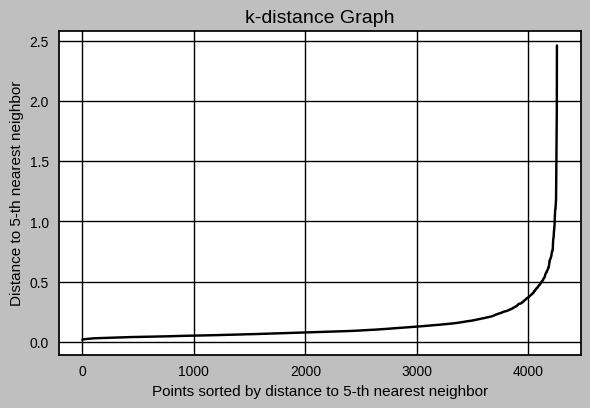

In [59]:
from sklearn.neighbors import NearestNeighbors

# Set the value of min_samples (same as in DBSCAN)
min_samples = 5

# Fit a NearestNeighbors model to your data
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(rfm_df_scaled)

# Get the distances to the k-th nearest neighbor (min_samples-th neighbor)
distances, indices = neighbors_fit.kneighbors(rfm_df_scaled)

# The distances to the k-th nearest neighbor are in the last column
k_distances = np.sort(distances[:, -1], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(k_distances) + 1), k_distances)
plt.title('k-distance Graph', fontsize=14)
plt.xlabel('Points sorted by distance to {}-th nearest neighbor'.format(min_samples))
plt.ylabel('Distance to {}-th nearest neighbor'.format(min_samples))
plt.grid(True)
plt.show()

Number of clusters: 3
Number of noise points: 28


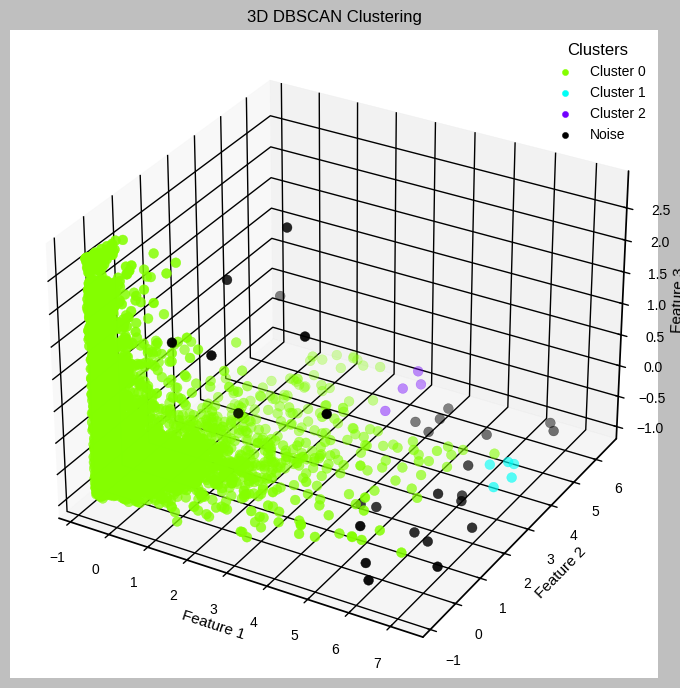

In [60]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan.fit(rfm_df_scaled)

# Get the cluster labels
labels = dbscan.labels_

# The number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

# Print the number of clusters and noise points
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# 3D Scatter plot of clusters
x = rfm_df_scaled.iloc[:, 0]  # First feature
y = rfm_df_scaled.iloc[:, 1]  # Second feature
z = rfm_df_scaled.iloc[:, 2]  # Third feature

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use a color palette for clusters and assign noise (-1) to a separate color
palette = sns.color_palette("hsv", n_colors=n_clusters)
colors = [palette[label] if label != -1 else (0, 0, 0) for label in labels]  # Noise points are black

# Plot each point, coloring by cluster
scatter = ax.scatter(x, y, z, c=colors, marker='o', s=50)

# Label axes based on the features (customize as needed)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Manually create a legend for clusters and noise
for cluster_id in set(labels):
    if cluster_id != -1:
        ax.scatter([], [], [], color=palette[cluster_id], label=f'Cluster {cluster_id}')
    else:
        ax.scatter([], [], [], color='black', label='Noise')

# Add legend
ax.legend(title="Clusters")

# Show plot
plt.title("3D DBSCAN Clustering")
plt.show()


In [61]:
# Get the cluster labels (including noise points)
labels = dbscan.labels_

# Exclude noise points (label == -1) from the Silhouette Score calculation
if len(set(labels)) > 1:  # Make sure there are at least 2 clusters (including noise)
    mask = labels != -1  # Exclude noise
    silhouette_avg = silhouette_score(rfm_df_scaled[mask], labels[mask])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("DBSCAN did not form any clusters (only noise).")

Silhouette Score: 0.685694076143982




---



#Hierarchical Clustering

**Finding optimal k**

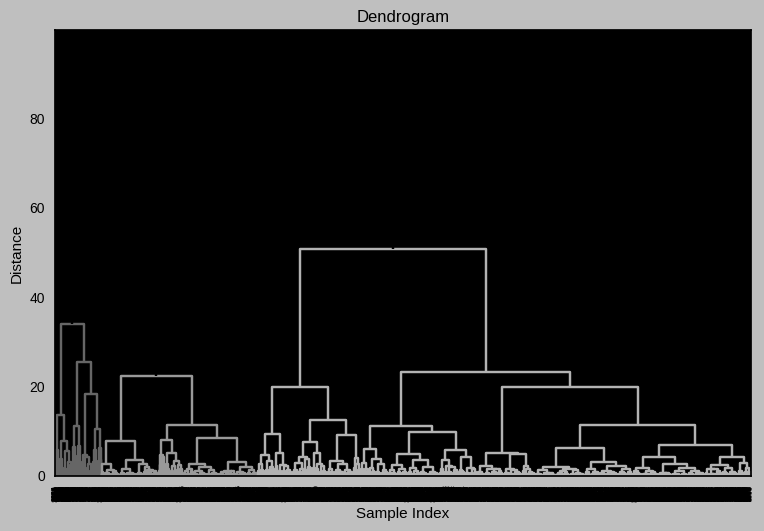

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(rfm_df_scaled, method='ward')  # You can use 'single', 'complete', or other methods
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

If you draw a horizontal line across the largest vertical gap (height), the number of vertical lines (clusters) that this horizontal line crosses indicates the optimal number of clusters. In the above dendrogram:

The largest gap appears to be between around 40 and 60 on the vertical axis.
Drawing a line across this gap would likely result in **2 or 3 clusters** (where the main large vertical distances are visible).


In [63]:
from sklearn.cluster import AgglomerativeClustering

silhouette = []
linkage_values = ['ward' , 'complete', 'average', 'single']
for i in linkage_values:
    AG = AgglomerativeClustering (n_clusters = 2 , linkage = i)
    AG.fit (rfm_df_scaled)
    score = silhouette_score(rfm_df_scaled, AG.fit_predict(rfm_df_scaled))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_linkage = pd.DataFrame(linkage_values, columns=['linkage'])
result = pd.concat([df_linkage, df_silhouette], axis=1)
result

,linkage,silhouette_score
0,ward,0.63
1,complete,0.69
2,average,0.69
3,single,0.54


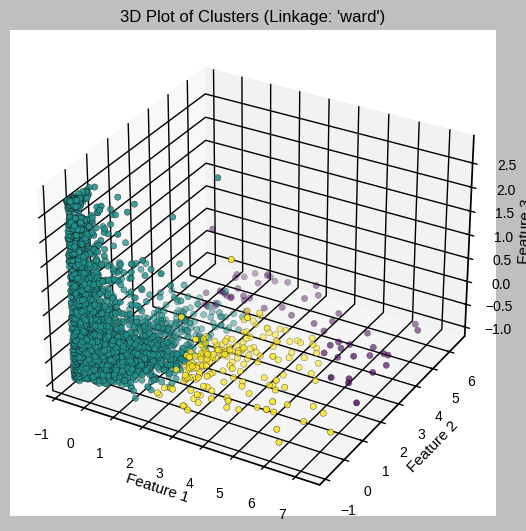

In [64]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Apply Agglomerative Clustering with the 'ward' linkage method
AG = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
labels = AG.fit_predict(X)

# Plot 3D scatter using all three columns of rfm_df_scaled
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o', edgecolor='k')
ax.set_title("3D Plot of Clusters (Linkage: 'ward')")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()

**StreamLIT**

In [65]:
import pickle

pickle.dump(kmeans,open("kmeans.pkl",'wb'))

In [66]:
kmeans = pickle.load(open("kmeans.pkl",'rb'))

In [67]:
def clustering(Amount, Frequency, Recency):

    new_customer = np.array([[Amount, Frequency, Recency]])

    predicted_cluster = kmeans.predict(new_customer)

    if predicted_cluster[0]==0:
        return "New/Infrequent Shoppers"
    elif predicted_cluster[0]==1:
        return "Loyal Regulars"
    else:
        return "High-Value/Big Spenders"

In [68]:
# test 1

Amount = 10000000000000
Frequency = 10000000000
Recency = 1000

predicted_cluster = clustering(Amount, Frequency, Recency)
print(f'New Customer assigned to Cluster: {predicted_cluster}')

New Customer assigned to Cluster: High-Value/Big Spenders


In [69]:
# test 1

Amount = 1
Frequency = 1
Recency = 1000

predicted_cluster = clustering(Amount, Frequency, Recency)
print(f'New Customer assigned to Cluster: {predicted_cluster}')

New Customer assigned to Cluster: New/Infrequent Shoppers
